# Domaća zadaća 1
#### Rok za predaju: 15. ožujka, 2022. u 23:59h
Zadaću trebate riješiti tako da u Teams assignment priložite bilježnicu s rješenjima ili postavite poveznicu na Google Colab bilježnicu.

Pokušajte matematičke izrate napisati u $\LaTeX$-u. Ako budete imali problema, napišite rješenje na papiru i dodajte sliku u Markdown ćeliju (ali ne zaboravite priložiti sliku u assignment).

Kao $\LaTeX$ referencu možete koristiti knjigu [Ne baš tako kratak uvod u TEX](http://www.mathos.unios.hr/images/uploads/798.pdf). Za Markdown pogledajte [Markdown cheatsheet](https://enterprise.github.com/downloads/en/markdown-cheatsheet.pdf).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Ovdje učitajte dodatne biblioteke koje budete koristili

## Zadatak 1 (5)
Model funkcija $h_{\Theta}(x) : \mathbb{R}^n \to \mathbb{R}$ je zadana s
$$
h_{\Theta}(x) = \theta_0 + \sum_{i=1}^n\theta_ix_i.
$$
Dokažite da je funkcija gubitka $J : \mathbb{R}^{n+1} \to \mathbb{R}$ zadana s
$$
J(\Theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\Theta}(x^{(i)})-y^{(i)})^2
$$
konveksna. Parametar $\Theta$ je jednak $[\theta_0 \theta_1 \dots \theta_n]^T \in \mathbb{R}^{n+1}$.

(**Hint**: kakvo svojstvo ima Hesijan konveksne funkcije?)

---

#### TM Neka je $S \in R^n $ neprazan otvoren konveksan skup i $f:S podskup of R^n -> R$ dvaputa neprekidno diferencijabilna funkcija. Tada: f je konveksna ako i samo ako je njena hessijan matrica pozitivno semidefinitna u svakoj tocki iz S 
#### Definicija 3.8 Simetricna matrica $A ∈ R^(n×n)$je pozitivno definitna ukoliko za bilo koji vektor $p != 0$ vrijedi $p^T·A·p > 0$. Ukoliko vrijedi $p^T·A·p ≥ 0$ matrica je pozitivno semidefinitna.

#### krenimo od $J(\Theta) = \frac {1}{2m}(X \Theta-y)^T(X \Theta-y)= \frac{1}{2m}((X \Theta)^T X \Theta - (X \Theta)^Ty - y^TX\Theta+Y^TY) $
#### $J(\Theta) = \frac{1}{2m}(\Theta^T X^T X\Theta - \Theta^T X^T y - Y^T X \Theta + y^T y)$

##### $(\Theta^T X^T y)=Y^T X \Theta su realni brojevi$

#### Pa imamo $J(\Theta) = \frac{1}{2m} (\Theta^T X^T X\Theta - 2\Theta^T X^T y + y^T y)$
#### sledece deriviramo po $\frac {\partial} {\partial\theta} $
#### Dobit cemo da $\frac {\partial J} {\partial\theta} = \frac{1}{m}(X^TX\Theta - X^Ty)$
#### zatim cemo ponovo derivirati po $ \Theta $
#### Dobivamo da je $\frac{\partial^2 J(\Theta)}{\partial \Theta^2} = \frac{1}{m}(X^TX)$
##### Uzmimo sada vektor $p \neq 0$ i provjerimo vrijedili da je $p^T·A·p > 0$ ako to jos dokazemo onda znaci da je nasa funkcija konveksna 

#### $p^T\frac{\partial^2 J(\Theta)}{\partial \Theta^2}p = p^T \frac{1}{m}(X^TX) p = \frac{1}{m} (p^T X^T X p) = \frac{1}{m} (X p)^T X p = \frac{1}{m} ||X p||^2 \geq 0 $

##### Kako smo dobili da vrijedi da je $p^T·A·p ≥ 0$ nasa je matrica pozitivno semidefinitna => nasa funkcija J(\Theta) je koveksna



---

## Zadatak 2 (5)
Izračunajte gradijent funkcije 
$$J(\Theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\Theta}(x^{(i)})-y^{(i)})^2$$
za istu model funkciju $h_{\Theta}$ iz zadatka 1.

---

$$\nabla J(\Theta) = \left[\begin{array}{c}
\cfrac{\partial J}{\partial \theta_0}\\
\cfrac{\partial J}{\partial \theta_1}\\
\vdots \\
\cfrac{\partial J}{\partial \theta_n} 
\end{array}\right] = \frac{1}{m} \left[\begin{array}{c}
\sum\limits_{i=1}^{m}(x_0^{(i)})(\Theta^T x^{(i)} - y^{(i)})\\
\sum\limits_{i=1}^{m}(x_1^{(i)})(\Theta^T x^{(i)} - y^{(i)})\\
\vdots \\
\sum\limits_{i=1}^{m}(x_n^{(i)})(\Theta^T x^{(i)} - y^{(i)})
\end{array}\right] = \frac{1}{m} \left[\begin{array}{c}
\sum\limits_{i=1}^{m}(x_1^{(i)} \Theta^T x^{(i)}) \\
\sum\limits_{i=1}^{m}(x_2^{(i)} \Theta^T x^{(i)}) \\
\vdots \\
\sum\limits_{i=1}^{m}(x_n^{(i)} \Theta^T x^{(i)})
\end{array}\right] - \frac{1}{m} \left[\begin{array}{c}
\sum\limits_{i=1}^{m}(x_1^{(i)} y^{(i)}) \\
\sum\limits_{i=1}^{m}(x_2^{(i)} y^{(i)}) \\
\vdots \\
\sum\limits_{i=1}^{m}(x_n^{(i)} y^{(i)}) \end{array}\right]

---

## Zadatak 3 (20)
Zadani su ulazni podaci $X\in \mathbb{R}^{m \times n}$ i pripadne izlazne vrijednosti $y\in\mathbb{R}^{m}$. Na ovim podacima možemo provesti proces učenja modela linearne regresije.

Učenje se svodi na minimizaciju funkcije $J(\Theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\Theta}(x^{(i)})-y^{(i)})^2$, a do rješenja dolazimo primjenom gradijentne metode.

Implementirajte gradijentnu metodu za učenje modela linearne regresije u općenitom slučaju kada su ulazni podaci dimenzije $X\in \mathbb{R}^{m\times n}$.<br>

Dodajte mogućnost crtanja grafa funkcije gubitka $J(\Theta)$ po iteracijama. Drugim riječima, u svakoj iteraciji  metode spremite vrijednost funkcije gubitka.

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254

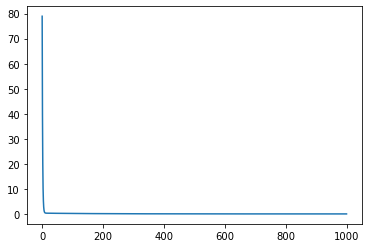

array([[1.91222677],
       [3.01399761]])

In [5]:
def J(theta, X, y, m) :
    #sum = 0
    #for i in range(m):
    #    sum += (np.transpose(theta)@X[i] - y[i])**2
    #return 1/(2*m)*sum

    return ((1/(2*m)) * (X@theta - y).T@(X@theta - y))[0,0]
def J_grad(theta, X, y, n, m):
    #sum = 0
    #for i in range (m):
    #    for j in range(n):
    #        sum += (np.transpose(theta)@X[i] - y[i])*X[i][j]
    #return (1/m) * sum


    return (1/m) * (X.T@X@theta - X.T@y)

def grad_method(iter, n, m, X, y, alfa):
    ones = np.ones(m).reshape(-1, 1) #vektor jedinica (1,1,1,1)^T
    X_new = np.hstack((ones, X)) #(1,x1,x2,x3 )
    print(X_new)
    theta = np.zeros((n+1,1))
    jot = []
    for i in range(iter):
        print(i)
        theta = theta - alfa*J_grad(theta, X_new, y, n, m)
        jot.append(J(theta, X_new, y, m))
    plt.plot(np.arange(iter), jot)
    plt.show()
    return theta

X = np.arange(10).reshape((-1,1))
#print(X)
y = np.array([2 + 3*i for i in X])
#print(y)

grad_method(10**3, 1, 10, X, y, 0.01)

---

## Zadatak 4 (15)
U datoteci house.csv se nalaze podaci koji sadrže različite karakteristike (varijable) nekretnina poput površine nekretnine, površine zemljišta, godine izgradnje, broja soba te cijene. Cilj narednih zadataka je konstrukcija modela linearne regresije čiji je cilj predviđanje cijene nekretnine. 

U ovom zadatku trebate konstruirati model jednostavne linearne regresije. Kao ulaznu varijablu uzmite *sqft_living*, a kao izlaznu varijablu uzmite *price*. 

1. Učitajte podatke koji su vam dani u datoteci *house.csv*. 

2. Konstruirajte *numpy.array*e koji sadrže matricu dizajna $X\in \mathbb{R}^{m \times n}$ (ili $X\in \mathbb{R}^{m \times (n+1)}$ ako želite da svi elementi prvog rekta matrice budu jednaki 1) i vektor izlaznih podataka $y \in \mathbb{R}^{m}$. U ovom zadatku je $n=1$. 

3. Koristeći proizvoljnu biblioteku vizualizirajte odnos varijable ulaznih i izlaznih podataka. 

4. Slučajnim odabirom razdvojite skup podataka na skup za treniranje i skup za testiranje modela. (npr. [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) kao na vježbama). Na taj način ćete dobiti *numpy.array*e $X_{train}$, $y_{train}$, $X_{test}$ te $y_{test}$. Neka se u skupu za treniranje nalazi $80\%$ ukupnog broja podataka.

5. Skalirajte podatke koristeći [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Scaler trebate fitati na skupu za treniranje i isti scaler iskoristiti za skaliranje testnog skupa.

6. Pokrenite gradijentnu metodu koju ste implementirali u prethodnom zadatku i pomoću nje odredite parametre $\theta_0$ i $\theta_1$. Duljinu koraka i broj iteracija odredite sami.

7. Pravac određen izračunatim  parametrima $\theta_0$ i $\theta_1$ prikažite na grafu iz podzadatka 3.

8. Nacrtajte  graf funkcije gubitka $J(\Theta)$ po iteracijama.

9. Na podacima za testiranje testirajte svoj model tako da izračunate pogrešku kao što smo pokazali na vježbama. Ispišite vrijednost pogreške.

10. Za podatke $X_{train}$ i $y_{train}$ opet odredite parametre $\theta_0$ i $\theta_1$, ali koristeći [gotovu implementaciju](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz scikit-learn biblioteke. Pripazite na dimenzije od $X_{train}$ i $y_{train}$.

11. Razlikuju li se model koji ste dobili koristeći vašu implementaciju gradijentne metode i model koji ste dobili ste dobili koristeći gotovu implementaciju iz *scikit-learn* biblioteke? 

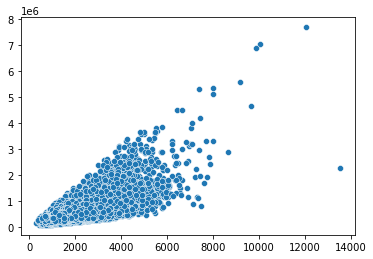

[[ 1.         -0.24415811]
 [ 1.          0.71010803]
 [ 1.          0.28483725]
 ...
 [ 1.         -0.37900007]
 [ 1.          0.53377625]
 [ 1.         -0.10931616]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
23

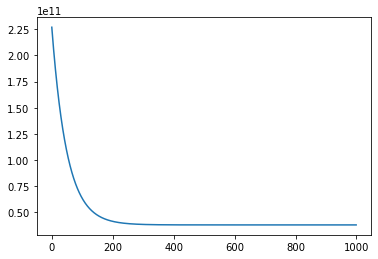

[[552061.04248466]
 [283194.89422184]]
[[ 1.         -0.24415811]
 [ 1.          0.71010803]
 [ 1.          0.28483725]
 ...
 [ 1.         -0.37900007]
 [ 1.          0.53377625]
 [ 1.         -0.10931616]]


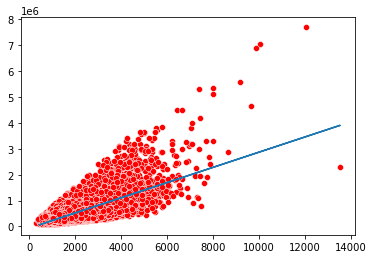

In [6]:
# Ovdje napišite svoje rješenje (možete i u više odvojenih ćelija radi preglednosti)
df= pd.read_csv('./house.csv')
df.head()
X= df['sqft_living'].to_numpy()
y= df['price'].to_numpy()

#plt.plot(552061.04248466,283194.89422184)
sns.scatterplot(data = df, x=X,y=y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

X_train = X_train.reshape((-1,1))
y_train = y_train.reshape((-1,1))
X_test = X_test.reshape((-1,1))
y_test = y_test.reshape((-1,1))

scaler = preprocessing.StandardScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

theta = grad_method(10**3, 1, X_train.shape[0], X_train, y_train, 0.01) #zasto tocno radi sa shape[0] nes nevalja sa m 
print(theta)
ones = np.ones(X_train.shape[0]).reshape(-1,1)
x_train = np.hstack((ones,X_train))
line = theta.T@x_train.T
line = line.T
sns.scatterplot(data = df, x=X,y=y, color="red")
plt.plot(scaler.inverse_transform(x_train[:,1]),line)
print(x_train)


In [8]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_
loss = 0
for i, prediction in enumerate(lr.predict(X_test)):
    loss += (prediction - y_test[i])**2
print(loss / (2 * X_test.shape[0]))
lr.score(X_test,y_test)



[3.32787283e+10]


array([[283207.12062651]])

In [11]:
reg = LinearRegression().fit(X_train,y_train)
reg.coef_


array([[283207.12062651]])

##### Modeli se nerazlikuju

---

## Zadatak 5 (15)
U ovom zadatku trebate konstruirati model multivarijantne (višestruke) linearne regresije. Izlazna varijabla je opet *price*.

1. Odaberite barem 3 varijable (različite od *price*) koje će vam predstavljati ulazne varijable modela. Napravite podjelu na skup za treniranje i testiranje kao u prethodnom zadatku.

2. Napravite kratku analizu odabranih varijabli (uz vizualizaciju) i vizualizirajte veze između odabranih varijabli. Ukratko argumentirajte zašto je vaš izbor dobar (ili loš) za izgradnju modela linearne regresije.

3. Skalirajte podatke kao u prethodnom zadatku i izračunajte parametre $\theta_0, \theta_1, \dots, \theta_n$ koristeći implementaciju gradijentne metode iz trećeg zadatka. 

4. Testirajte kvalitetu svojeg modela na podacima za testiranje $X_{test}$ i $y_{test}$ tako da ispišete vrijednost pogreške na skupu za testiranje.

5. Za podatke $X_{train}$ i $y_{train}$ opet odredite parametre $\theta_0, \theta_1, \dots, \theta_n$, ali koristeći [gotovu implementaciju](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz scikit-learn biblioteke.

6. Za podatke $X_{train}$ i $y_{train}$ opet odredite parametre $\theta_0, \theta_1, \dots, \theta_n$, ali koristeći sustav normalnih jednadžbi. 

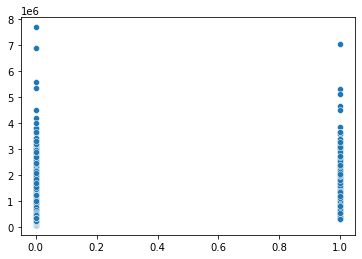

In [25]:
# Ovdje napišite svoje rješenje (možete i u više odvojenih ćelija radi preglednosti)
X_1 = df['waterfront'].to_numpy()
X_2 = df['sqft_basement'].to_numpy()
X_3 = df['long'].to_numpy()
ys= df['price'].to_numpy()




sns.scatterplot(data = df, x=X_1,y=y)
plt.show()

#### vidimo da su vrijednosti waterfronta ili da ili ne sto je diskretno obiljezje a graficki nemozemo povuci neki pravac koji bi dobro opisivao zadane vrijednosti 

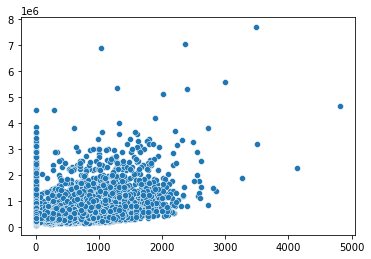

In [22]:
sns.scatterplot(data = df, x=X_2,y=y)
plt.show()

#### U slucaju kvadrature podruma kuca opet nevidimo graficki neku vezu da mi mogli uspostaviti linearnu vezu

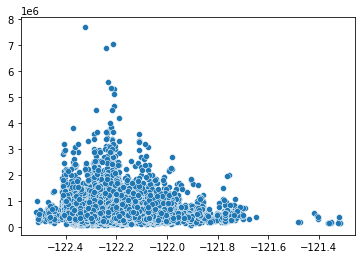

In [24]:
sns.scatterplot(data = df, x=X_3,y=y)
plt.show()

#### U slucaju kategorije long opet nevidimo neku pravilnost koju bi mogli opisati pravcem 

In [27]:
Xes = np.hstack((X_1,X_2,X_3))
X_trains, X_tests, y_trains, y_tests = train_test_split(Xes,ys,test_size=0.8,random_state=42)
X_trains = X_trains.reshape((-1,1))
y_trains = y_trains.reshape((-1,1))
X_tests = X_tests.reshape((-1,1))
y_tests = y_tests.reshape((-1,1))
print(X_trains)

scaler = preprocessing.StandardScaler()
scaler.fit(X_trains, y_trains)
X_trains = scaler.transform(X_trains)
X_tests = scaler.transform(X_tests)

theta = grad_method(10**3, 1, X_train.shape[0], X_trains, y_trains, 0.01)
print(theta)


ValueError: Found input variables with inconsistent numbers of samples: [64839, 21613]